# Fashion MNIST - Dimensionality Reduction & Classification

## Installing required libraries

In [ ]:
pip install tensorflow numpy scikit-learn umap-learn matplotlib plotly keras

In [1]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.1 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1131a48caf34cc4eea40f6102505fecaef7099a78b92ce7c126cdcd6d247c921
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


## Importing libraries

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras import layers, models

## Data Pre-processing

### Retrieving Fashion MNIST data from Tensorflow API

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(f"Dataframe shapes:\n\nX_train:{X_train.shape}\ny_train:{y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

Dataframe shapes:

X_train:(60000, 28, 28)
y_train:(60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


### Reshaping the datasets as a requirement for visualization

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print(f"Dataframes reshaped:\n\nX_train:{X_train.shape}\nX_test:{X_test.shape}")

Dataframes reshaped:

X_train:(60000, 784)
X_test:(10000, 784)


### Normalizing the datasets

In [6]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

### Standardizing or Scaling the datasets

In [7]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
print(f"X_train Scaled shape: {X_train_scaled.shape}")
print(f"X_test Scaled shape: {X_test_scaled.shape}")

X_train Scaled shape: (60000, 784)
X_test Scaled shape: (10000, 784)


### Functions to plot the graphs after Dimensionality Reduction

In [8]:
def plot_graph(embedding, labels, technique):
    plt.figure(figsize=(10, 6))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=10)
    plt.colorbar(label='Fashion MNIST Class')
    plt.xlabel(f'{technique} Component 1')
    plt.ylabel(f'{technique} Component 2')
    plt.title(f'Fashion MNIST Dataset - {technique}')
    plt.show()

In [9]:
def plot_graph3D(embedding, labels, technique):
    fig = go.Figure(data=[go.Scatter3d(
        x=embedding[:, 0],
        y=embedding[:, 1],
        z=embedding[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=labels,
            colorscale='Spectral',
            opacity=0.8
        )
    )])

    fig.update_layout(
        scene=dict(
            xaxis_title=f'{technique} Component 1',
            yaxis_title=f'{technique} Component 2',
            zaxis_title=f'{technique} Component 3'
        ),
        title=f'Fashion MNIST Dataset - {technique}'
    )

    fig.show()

## Dimensionality Reduction

**Dimensionality Reduction** is a technique used in Machine Learning and Data Analysis to reduce the number of input variables or features in a dataset. The goal of dimensionality reduction is to simplify the dataset while retaining as much relevant information as possible.

This problem is also sometimes termed as **The Curse of Dimensionality**. It is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.

**Importance of Dimensionality Reduction:**

- Getting down to two or three features can help us visualize our data which is an important part of data analysis.
- Often a lot of dimensionality in the data is redundant and we can get rid of it which can be useful and efficient for the Machine Learning process.
- Reducing the dimensionality can also help us in visualising the data easily.

**Techniques:**

1. Principal Component Analysis (PCA)
2. t-Distributed Stochastic Neighbor Embedding (t-SNE)
3. Uniform Manifold Approximation and Projection (UMAP)

### Principal Component Analysis (PCA)

In [12]:
start_time = time.time()
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
time_taken = time.time() - start_time
print(f"Time taken: {time_taken:.2f} seconds")

Time taken: 1.74 seconds


**2-Dimensional Plot**

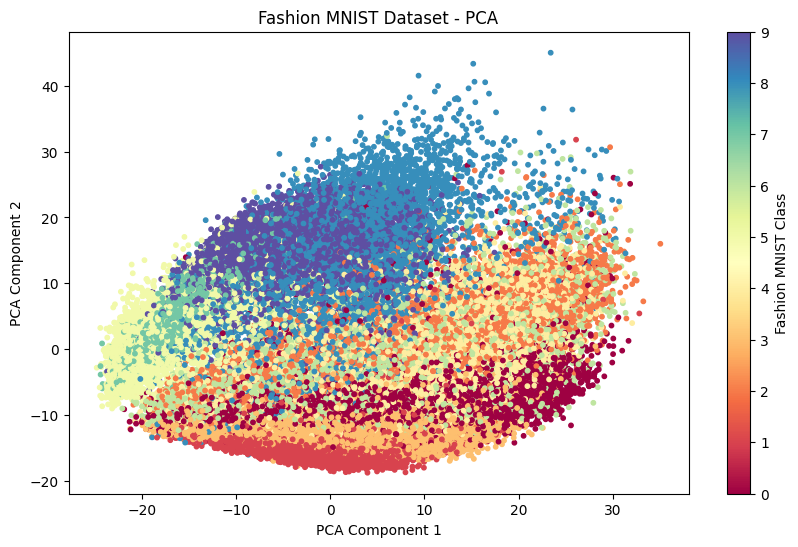

In [13]:
plot_graph(X_train_pca, y_train, 'PCA')

**3-Dimensional Plot**

In [14]:
plot_graph3D(X_train_pca, y_train, 'PCA')

Output hidden; open in https://colab.research.google.com to view.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [15]:
start_time = time.time()
tsne = TSNE(n_components=3, perplexity=50, n_iter=500)
X_train_tsne = tsne.fit_transform(X_train_scaled)
time_taken = time.time() - start_time
print(f"Time taken: {time_taken:.2f} seconds")

Time taken: 3773.22 seconds


**2-Dimensional Plot**

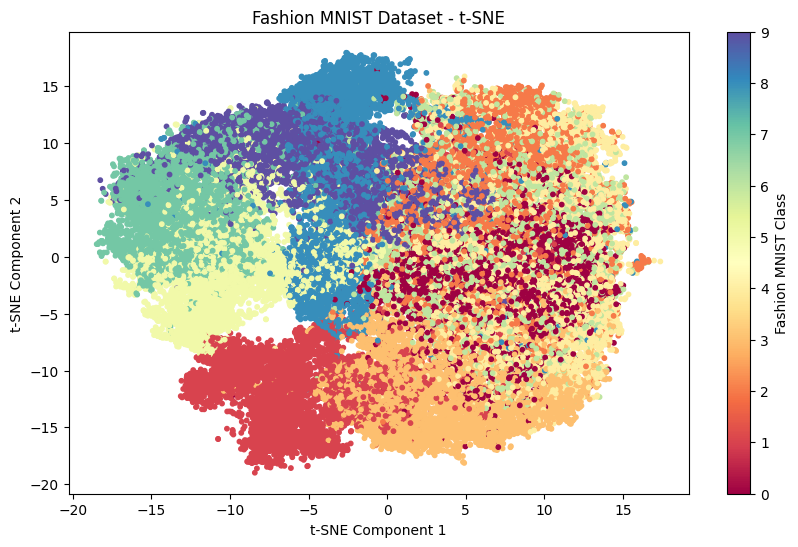

In [ ]:
plot_graph(X_train_tsne, y_train, 't-SNE')

**3-Dimensional Plot**

In [ ]:
plot_graph3D(X_train_tsne, y_train, 't-SNE')

Output hidden; open in https://colab.research.google.com to view.

### Uniform Manifold Approximation and Projection (UMAP)

In [18]:
start_time = time.time()
umap_model = umap.UMAP(n_components=3, n_jobs=-1)
X_train_umap = umap_model.fit_transform(X_train_scaled)
time_taken = time.time() - start_time
print(f"Time taken: {time_taken:.2f} seconds")

Time taken: 94.52 seconds


**2-Dimensional Plot**

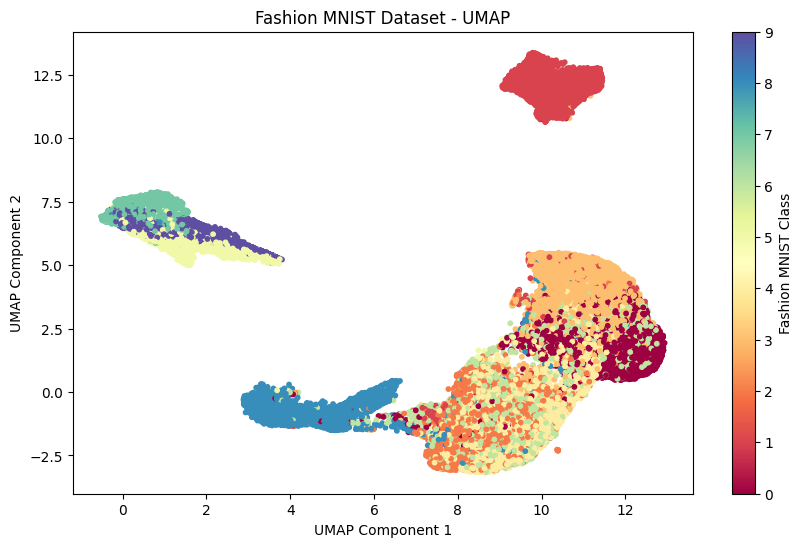

In [19]:
plot_graph(X_train_umap, y_train, 'UMAP')

**3-Dimensional Plot**

In [21]:
plot_graph3D(X_train_umap, y_train, 'UMAP')

Output hidden; open in https://colab.research.google.com to view.

## Classification Prediction

**Applying DR on Test data**

In [22]:
X_test_pca = pca.fit_transform(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_umap = umap_model.fit_transform(X_test_scaled)

### Machine Learning Model Training & Testing

In [ ]:
models = {
    'SVC': SVC(kernel='rbf', C=8),
    'KNN': KNeighborsClassifier(n_neighbors=100, weights='distance', p=1),
    'RandomForest': RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=4)
}

results = []

for model_idx, (model_name, model) in enumerate(models.items()):
    for dr_idx, dr_name in enumerate(['PCA', 't-SNE', 'UMAP']):
        X_train_dr, X_test_dr = None, None
        if dr_name == 'PCA':
            X_train_dr, X_test_dr = X_train_pca, X_test_pca
        elif dr_name == 't-SNE':
            X_train_dr, X_test_dr = X_train_tsne, X_test_tsne
        elif dr_name == 'UMAP':
            X_train_dr, X_test_dr = X_train_umap, X_test_umap

        start_time = time.time()
        model.fit(X_train_dr, y_train)
        end_time = time.time()

        accuracy = model.score(X_test_dr, y_test)

        results.append({'Classifier': model_name, 'Dimensionality Reduction': dr_name, 'Accuracy': accuracy, 'Time': end_time - start_time})

results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False, inplace=True)
results_df

,Classifier,Dimensionality Reduction,Accuracy,Time
7,RandomForest,t-SNE,0.7035,6.211585
4,KNN,t-SNE,0.7012,0.034905
1,SVC,t-SNE,0.7003,23.886360
0,SVC,PCA,0.6520,41.100124
3,KNN,PCA,0.6512,0.032097
6,RandomForest,PCA,0.6414,6.367319
8,RandomForest,UMAP,0.0062,6.164095
2,SVC,UMAP,0.0005,24.625560
5,KNN,UMAP,0.0003,0.031983


### Results

From the evaluation above, it is evident that t-SNE performs best out of the 3 Dimensionality Reduction techniques. The only drawback with t-SNE is that it takes a lot of time to process. And, combined with classification models, Random Forest with 70.35% accuracy and KNN with 70.12% accuracy are performing the best on t-SNE embeddings. However, taking the execution time into consideration, **KNN** performs the best overall with the lowest execution time and minimal accuracy difference compared to Random Forest.

### Deep Learning Model Training & Testing - CNN

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(f"Dataframe shapes:\n\nX_train:{X_train.shape}\ny_train:{y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

In [19]:
x_train = np.expand_dims(X_train, axis=-1)
x_test = np.expand_dims(X_test, axis=-1)

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                      

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 7s 5ms/step - loss: 0.4919 - accuracy: 0.8209 - val_loss: 0.4262 - val_accuracy: 0.8453
Epoch 2/10
938/938 [==============================] - 5s 6ms/step - loss: 0.3386 - accuracy: 0.8754 - val_loss: 0.3050 - val_accuracy: 0.8892
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2976 - accuracy: 0.8902 - val_loss: 0.3001 - val_accuracy: 0.8883
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2747 - accuracy: 0.8988 - val_loss: 0.2947 - val_accuracy: 0.8921
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2576 - accuracy: 0.9040 - val_loss: 0.2695 - val_accuracy: 0.9033
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.2440 - accuracy: 0.9097 - val_loss: 0.2568 - val_accuracy: 0.9046
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2345 - accuracy: 0.9114 - val_loss: 0.2556 - val_accuracy: 0.9057
Epoch 

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"CNN Test accuracy: {test_acc*100:.2f}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.2476 - accuracy: 0.9134
CNN Test accuracy: 91.34%


### Results

CNN performs very well with accuracy of 91.34%. Deep Learning models generally tend to perform better over Machine Learning but this is not the case every time.

**Note:** This CNN model was trained with original data, not the DR embeddings.